# **PROBLEMA**

Se nos ha dispuesto la problemática de dar un análisis, mediante modelos de regresión, sobre las variables que más afectan a la popularidad de una canción. Contamos con un conjunto de datos que contiene diversas canciones con valores desglosados que aportan información sobre las mismas. Empezemos con una primera aproximación.

# **Intuición**

Con un vistazo a los datasets, podemos suponer varios atributos aparentemente relavantes, como puede ser danceability o energy. Es intuitivo pensar que cuanto más cuantiosas sean estas propiedades, más aceptación tendrá en la gente y por tanto, más popularidad.

Sin embargo, no parece que podamos extraer muchas más conlusiones del conjunto, salvo que no parece que haya una variable que claramente    
condicione una por ahora hipotética predicción de la popularidad.

# **Lectura de datos**

Primeramente extraemos los datos de los ficheros proporcionados. Los hemos subido a github por ser un buen método para almacenar ficheros estáticos.

In [1]:
import pandas as pd

# Ocultar warnings que no son relevantes para la presentación
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

URL_TRAIN = "https://raw.githubusercontent.com/MarioGRBlanco/MCP/main/train_ap1_mcp_23_24_train.csv"
URL_TEST  = "https://raw.githubusercontent.com/MarioGRBlanco/MCP/main/test_ap1_mcp_23_24_test.csv"

X = pd.read_csv(URL_TRAIN, sep=",") # Dataset de entrenamiento
Y = pd.read_csv(URL_TEST,  sep=",") # Dataset de training

display(X)
display(Y)

,song_name,song_id,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,I’ll Come Running (To Tie Your Shoe),782579,34,0.5350,0.584,218227,0.459,0.034200,0,0.1530,-14.127,0,0.0319,124.465,3,0.7650
1,Mohican,150969,47,0.3210,0.758,206600,0.503,0.000234,0,0.1210,-11.445,0,0.1600,120.027,3,0.4770
2,"Todo Quedó, Quedó (En Vivo) [feat. Nelsón Arri...",261974,25,0.1680,0.732,304970,0.824,0.000021,11,0.9420,-9.296,0,0.1170,102.002,3,0.8260
3,Be Glorified,360055,39,0.0726,0.553,307040,0.718,0.000003,8,0.1520,-6.385,0,0.0248,87.989,3,0.6770
4,Guilty Pleasure,745239,57,0.0032,0.641,204435,0.844,0.000000,9,0.1060,-5.758,0,0.0465,150.030,3,0.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Make Me Wanna,74370,62,0.0369,0.545,225067,0.818,0.000000,0,0.1010,-6.380,0,0.0541,109.019,2,0.6790
23996,Maui Battles - Score Demo,19552,41,0.2350,0.232,117733,0.587,0.918000,1,0.3950,-13.186,1,0.1010,81.943,3,0.1130
23997,6 Concerts transcrits en sextuor / 6e concert:...,549733,15,0.8900,0.624,248733,0.269,0.879000,8,0.1200,-20.798,1,0.0391,128.212,2,0.3820
23998,"Puccini: La bohème, Act 1: ""O soave fanciulla""...",884432,13,0.9780,0.196,248307,0.134,0.026100,5,0.1180,-13.981,1,0.0365,84.730,3,0.0386


,song_name,song_id,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,sunlight,163768,0.82900,0.625,203667,0.324,0.960000,3,0.1150,-10.729,0,0.0287,123.055,3,0.0694
1,Avant de quitter (Faust),993666,0.99500,0.174,246773,0.249,0.711000,6,0.0621,-11.343,0,0.0363,71.169,3,0.1560
2,Destiny,193666,0.00388,0.614,200008,0.863,0.001560,2,0.2300,-6.096,1,0.0763,149.913,3,0.3120
3,We Almost Lost Detroit,198820,0.91100,0.437,257173,0.232,0.000000,3,0.9740,-23.147,0,0.2980,89.836,3,0.3500
4,Suga Suga,371820,0.65700,0.701,239027,0.750,0.000003,8,0.0845,-3.191,1,0.2740,82.531,3,0.5150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Riptide (Pluto Tapes),867491,0.38800,0.585,193973,0.685,0.000000,4,0.1100,-6.490,1,0.0502,145.983,3,0.4600
5996,Sleepy Eyes,21619,0.05100,0.608,202887,0.736,0.000000,9,0.2150,-6.700,0,0.1650,97.038,3,0.4890
5997,Martyrdom of St. Victor,613505,0.48400,0.666,102347,0.280,0.000000,10,0.1530,-14.667,0,0.8520,97.969,2,0.4880
5998,Air Supply Bachata Medley,307822,0.09320,0.772,282000,0.761,0.000002,3,0.0450,-7.170,0,0.0274,119.991,3,0.7730


# **ANALISIS INICIAL DE LOS DATOS**

Con la funcion info hacemos una modesta aproximacion a los datos del dataframe. Comprobamos que tenemos un total de 16 atributos, cada una con 24k entradas. Destaca el hecho de que para todos los atributos, ninguna entrada tiene valor nulo. Vemos una columna tipo que contiene datos tipo object. Al venir de un csv, sabemos que ha de ser texto (a parte de que el atributo es song_name). Teniendo esto en cuenta, el preprocesamiento que habría que hacerle a este conjunto es mínimo.

Usamos la funcion describe para ver un resumen estadístico de los datos. Información como la desviación estándar o los percentiles podrían resultar de ayuda más adelante.

In [2]:
X.info()
info = pd.DataFrame()
info = X.copy()
info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         24000 non-null  object 
 1   song_id           24000 non-null  int64  
 2   popularity        24000 non-null  int64  
 3   acousticness      24000 non-null  float64
 4   danceability      24000 non-null  float64
 5   song_duration_ms  24000 non-null  int64  
 6   energy            24000 non-null  float64
 7   instrumentalness  24000 non-null  float64
 8   key               24000 non-null  int64  
 9   liveness          24000 non-null  float64
 10  loudness          24000 non-null  float64
 11  audio_mode        24000 non-null  int64  
 12  speechiness       24000 non-null  float64
 13  tempo             24000 non-null  float64
 14  time_signature    24000 non-null  int64  
 15  audio_valence     24000 non-null  float64
dtypes: float64(9), int64(6), object(1)
memor

,song_id,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,500840.366625,41.082417,0.370186,0.552322,2.358258e+05,0.569191,0.149253,5.330167,0.214456,-9.596249,0.347625,0.121792,117.645065,2.897083,0.452112
std,288296.975063,18.109720,0.356401,0.186490,1.275362e+05,0.264864,0.303700,3.461212,0.197887,6.038361,0.476226,0.188332,30.925825,0.397699,0.259177
min,18.000000,0.000000,0.000001,0.059000,1.721300e+04,0.000263,0.000000,0.000000,0.015200,-47.499000,0.000000,0.022500,34.856000,0.000000,0.000000
25%,251669.500000,29.000000,0.036700,0.433000,1.830998e+05,0.381000,0.000000,3.000000,0.097000,-11.848250,0.000000,0.036700,92.938000,3.000000,0.235000
50%,500290.000000,43.000000,0.233000,0.570000,2.208930e+05,0.601000,0.000041,5.000000,0.128000,-7.818000,0.000000,0.050000,115.636000,3.000000,0.443000
75%,752274.750000,55.000000,0.728000,0.689000,2.668218e+05,0.787000,0.036500,8.000000,0.264000,-5.500000,1.000000,0.107000,139.162250,3.000000,0.655000
max,999979.000000,99.000000,0.996000,0.980000,5.552917e+06,0.999000,0.993000,11.000000,0.996000,1.342000,1.000000,0.965000,236.735000,4.000000,1.000000


# **Explorando los datos**

Para tener una perspectiva más amplia de a que nos vamos a enfrentar hemos hecho un **representación gráfica** de todo el dataset, así podremos hacer un mejor preprocesamiento de los datos.

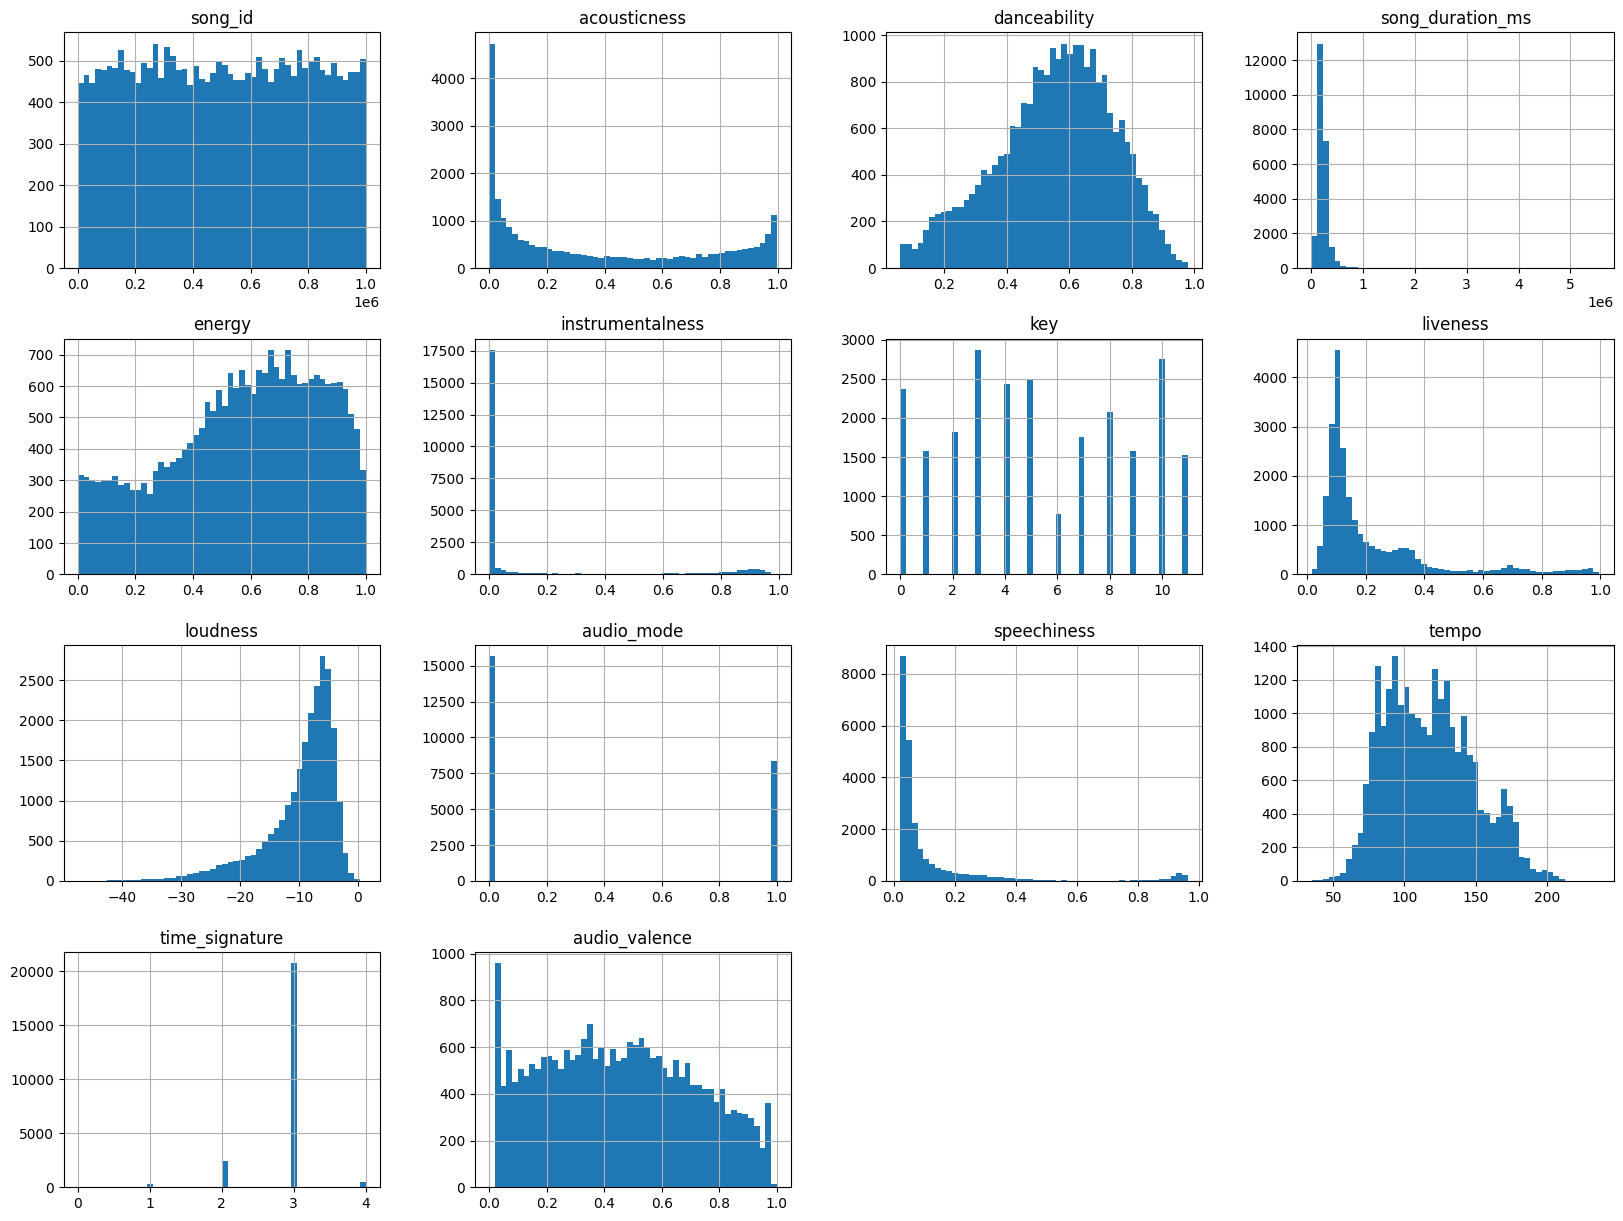

In [3]:
import matplotlib.pyplot as plt
del info["song_name"]
del info["popularity"]
info.hist(bins=50, figsize=(20,15))

plt.show()

Podemos ver un histograma de las variables númericas que nos aportará información interesante. Por ejemplo, en base a sus histogramas, podemos presumir que atributos como "acousticness", "song_duration_ms" o "instrumentalness" no aportarán mucha información al modelo a la hora de producir predicciones de popularidad, puesto que son muestras muy sesgadas, de mucha frecuencia en muy pocos valores.

Veamos ahora un mapa de calor.

<Axes: >

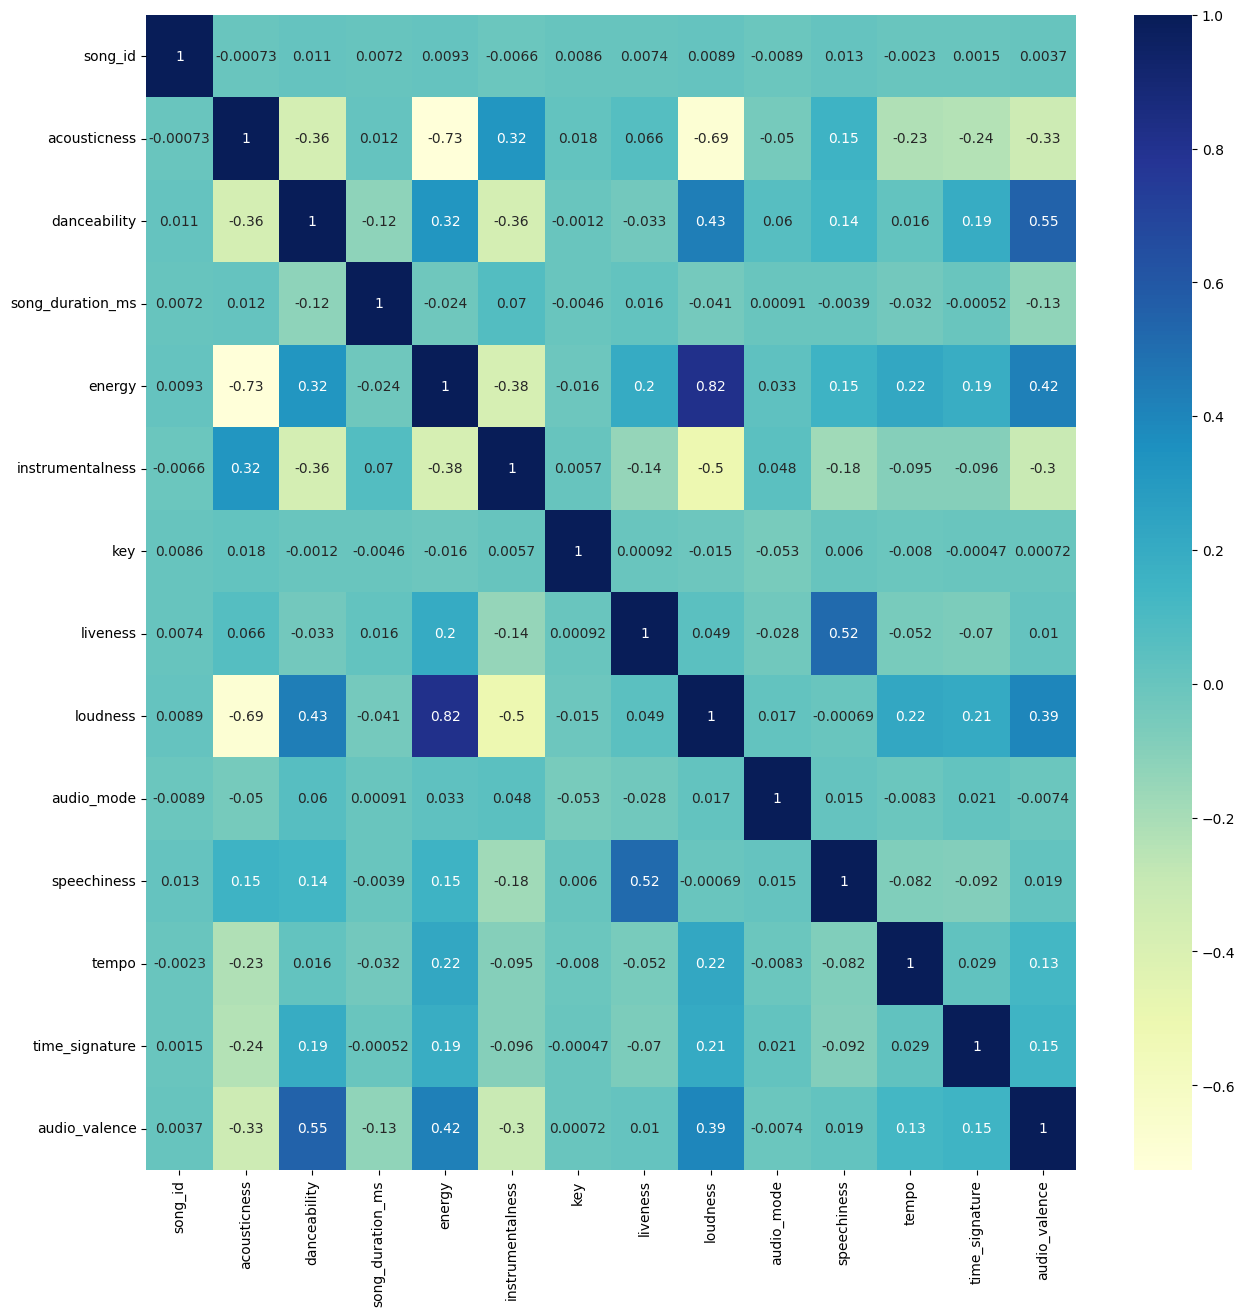

In [4]:
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(info.corr(),annot=True,cmap="YlGnBu", ax=ax)

Resulta especialmente interesante esta aproximación pues nos ayuda a ver las variables que más y menos aportan al modelo. Si bien no hay ninguna destacable ni variables que presenten mucha correlación entre sí, signo de posible redundancia entre ellas, vemos que muchas de las columnas aportan poco o nada al modelo. Parecen especialmente malas las columnas: acousticness e instrumentalness, coincidente con lo que observamos en en los histogramas. Una buena señal.

# **Preprocesamiento de datos**

Encontramos en el conjunto de datos, gracias a un más exhaustivo análisis de las conclusiones extraídas anteriormente, observamos **variables categoricas** dentro del conjunto (como "time_signature" o "key"), y resulta interesante el caso de el atributo audio_mode, que quizá por su naturaleza o por un anterior procesamiento parece haber pasado por un OneHotEncoder.

No hemmos encontrado ninguna manera adecuada de mejorar los atributos del conjunto con algún tipo de transformación, por lo que en este paso simplemente usaremos la función selectKbest de sickit-learn. 

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_T_p = X.copy()

# Eliminar columnas irrelevantes
del X_T_p["song_name"]
del X_T_p["popularity"]

# Crear una instancia de SelectKBest
selector = SelectKBest(f_classif, k=6)

# Ajustar el selector a los datos
X_T = selector.fit_transform(X_T_p, X["popularity"])

# Obtener las columnas seleccionadas
selected_feature_indices = selector.get_support(indices=True)
selected_columns = X_T_p.columns[selected_feature_indices]

# Imprimir las columnas seleccionadas
print("Columnas seleccionadas por SelectKBest:", selected_columns)


Columnas seleccionadas por SelectKBest: Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness'],
      dtype='object')


Cabe mencionar que usamos varios valores de K para intentar obtener un mejor desempeño de algún modelo y fue K=6 el que pareció dar unos mejores resultados.

Hemos usado cross-validation con 5 particiones para reducir el riesgo de overfitting.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
import statistics as stat
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import time

scaler = StandardScaler()
X_T_std = scaler.fit_transform(X_T)

# Función auxiliar para obtener los MAEs por cross-validation
def get_avg_std(reg, X, pop, scoring):
    maes = cross_val_score(reg, X, pop, cv=5, scoring=scoring)
    avg = stat.mean(maes)
    std_dev = stat.variance(maes)**(1/2)

    return maes, avg, std_dev

lr = LinearRegression()

elasticnet = ElasticNet(random_state=42, l1_ratio=0.1, alpha=0)


ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_T_std, X["popularity"])
best_alpha_ridge = grid_search.best_params_['alpha']
ridgeR = Ridge(best_alpha_ridge)

lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_T_std, X["popularity"])
best_alpha_lasso = grid_search.best_params_['alpha']
lassoR = Lasso(best_alpha_lasso)

neigh = KNeighborsRegressor(n_neighbors=5)

poly = PolynomialFeatures(degree=4) #Tras hacer diversas pruebas, 4 parece ser el grado que mejor predice el modelo
poly_reg = make_pipeline(poly, lr)

#------------------------- Pruebas ----------------------

datos_reg = {}
regressors = [("LinearRegression", lr), 
              ("ElasticNet", elasticnet), 
              ("KNeighbors", neigh),
              ("RidgeRegression", ridgeR),
              ("LassoRegression", lassoR),
              ("Polynomial Regression", poly_reg),
              ]

for reg_name, reg in regressors:
  start_time = time.time()

  maes, avg, std_dev = get_avg_std(reg, X_T_std, X["popularity"], "neg_mean_absolute_error")
  datos_reg[reg_name] = { "avg": avg, "std_dev": std_dev, "time": time.time() - start_time }

for reg_name, reg in regressors:
  maes, r2, _ = get_avg_std(reg, X_T_std, X["popularity"], "r2")
  datos_reg[reg_name]["avg_r2"] = r2


df = pd.DataFrame()
df["Regresor"]                = datos_reg.keys()
df["Average NMAE"]             = [ dato["avg"] for dato in datos_reg.values() ]
df["Standard Deviation MAE"]  = [ dato["std_dev"] for dato in datos_reg.values() ]
df["Average R2"]              = [ dato["avg_r2"] for dato in datos_reg.values() ]
df["time"]                    = [ dato["time"] for dato in datos_reg.values() ]

df


,Regresor,Average NMAE,Standard Deviation MAE,Average R2,time
0,LinearRegression,-13.013951,0.175039,0.194296,0.015000
1,ElasticNet,-13.013951,0.175039,0.194296,8.035087
2,KNeighbors,-12.981242,0.118088,0.155654,0.334841
3,RidgeRegression,-13.013951,0.175039,0.194296,0.013007
4,LassoRegression,-13.014099,0.175057,0.194296,0.277309
5,Polynomial Regression,-12.118550,0.178001,0.272008,0.969976


# **PREDICCIÓN**

Tras realizar las pruebas con los diferentes predictores, observamos que parece claramente mejor modelo el polinomial de grado 4, habiendo obtenido mejores calificaciones tanto en el average NMAE como en el average R^2.

Dicho lo cual, hacemos finalmente la predicción con el este modelo.

In [7]:
poly_reg.fit(X_T_std, X["popularity"])
prediccion_poly = poly_reg.predict(X_T_std)
solucion_poly = pd.DataFrame(data={
    "SongID": X["song_id"],
    "PredPopularity": prediccion_poly,
    "OriginalPop" : X["popularity"]

})

# Mostrar el DataFrame con las predicciones
display(solucion_poly)

,SongID,PredPopularity,OriginalPop
0,782579,39.019339,34
1,150969,42.729227,47
2,261974,40.679164,25
3,360055,48.438503,39
4,745239,47.175603,57
...,...,...,...
23995,74370,46.093713,62
23996,19552,30.874850,41
23997,549733,35.250380,15
23998,884432,23.992854,13


In [8]:
poly_reg.fit(X_T_std, X["popularity"])
Y_filtered = Y[selected_columns]
Y_std = scaler.fit_transform(Y_filtered)
# Realizar predicciones
prediccion_poly = poly_reg.predict(Y_std)

# # Crear DataFrame con las predicciones
solucion_poly = pd.DataFrame(data={
    "SongID": Y["song_id"],
    "Popularity": prediccion_poly
})

# Guardar las predicciones en un archivo CSV
solucion_poly.to_csv("PopPrediction.csv", index=False)

# Mostrar el DataFrame con las predicciones
display(solucion_poly)


,SongID,Popularity
0,163768,35.601811
1,993666,20.571831
2,193666,45.265312
3,198820,5.282680
4,371820,51.704253
...,...,...
5995,867491,46.447980
5996,21619,49.504252
5997,613505,15.476035
5998,307822,46.148742


# **CONCLUSIONES** 

Como era de esperar tras en análisis de los resultados del entrenamiento, y por la naturaleza del conjunto, los resultados obtenidos de las predicciones distan bastante de ser considerados aceptables. Sin embargo, comparado con otros modelos de regresión también analizados aquí, supone una mejora muy sustancial.

Es posible que aplicando otros modelos no regresivos pueda aumentarse la efectividad de la predicción. En nuestro caso, tras probar muchos modelos (incluso algunos que no aparecen aquí y no han sido incluidos por el enorme tiempo que tardaban en ajustarse) y con distintas aproximaciones al procesado de los datos, estos son los mejores resultados que hemos podido obtener.

